In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import kde
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
calibration_data = pd.read_csv("R 2 niels/PCA_CALIBRATION_2.csv")

In [5]:
calibration_data

,Subject,Item.number,Polarity,Expected_response,x001,x002,x003,x004,x005,x006,...,a093,a094,a095,a096,a097,a098,a099,a100,a101,Deviation
0,1,9,straight,blue,0.083337,0.083935,0.084534,0.085132,0.085730,0.086329,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Central
1,1,14,deviated,blue,0.033335,0.031449,0.029562,0.027676,0.025790,0.012657,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,NonCentral
2,1,15,deviated,blue,-0.008334,-0.008334,-0.008334,-0.008334,-0.008334,-0.008334,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,NonCentral
3,1,16,straight,blue,0.008334,0.008334,0.008334,0.008334,0.008334,0.008334,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Central
4,1,17,straight,blue,-0.041668,-0.041668,-0.041668,-0.041668,-0.041668,-0.041668,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,54,89,deviated,red,-0.072108,-0.072108,-0.069837,-0.065859,-0.064096,-0.064096,...,-0.000020,9.673706e-06,5.948624e-03,-0.000223,-7.366797e-03,-5.887499e-03,0.0,0.000000e+00,0.000000,NonCentral
4366,54,91,straight,red,-0.060090,-0.060090,-0.061122,-0.064437,-0.070726,-0.083013,...,-0.026485,-3.186958e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,Central
4367,54,92,straight,red,0.028042,0.028042,0.028042,0.028042,0.028042,0.028042,...,0.000000,-3.571490e-17,3.571490e-17,0.000000,0.000000e+00,0.000000e+00,0.0,5.210982e-02,0.023683,Central
4368,54,93,straight,red,-0.024036,-0.024036,-0.024036,-0.024036,-0.024036,-0.024036,...,-0.013611,-6.541066e-04,1.114275e-16,0.000000,-1.572366e-15,1.572366e-15,0.0,-1.114275e-16,-0.000493,Central


In [129]:
X = calibration_data.iloc[:,4:406]
y = calibration_data.iloc[:,406].values


#PCA 
pca_model = PCA(n_components= 13)
pca_model.fit(X)
X_pca = pca_model.transform(X)

numpy.ndarray

# VALIDATING R-studio results in Python using calibration/validation data. 

First we will calculate mean AUC scores across cross validation. 

In [169]:
lda = LinearDiscriminantAnalysis()
kf = KFold(n_splits= 10, shuffle= True)

roc_scores_list = []
for i in range(20):
    for train, test in kf.split(X_pca):
        lda.fit(X_pca[train,:], y[train])
        y_score_lda1 = lda.decision_function(X_pca[test,:])
        roc_scores_list.append(roc_auc_score(y[test], y_score_lda1))
        
    print(np.mean(roc_scores_list))

0.8225292015303867
0.8228386665692723
0.8230244102334504
0.823083971528181
0.8233113114252459
0.8234037275280016
0.8232195465057711
0.823179772016075
0.8230575524383501
0.8231165520499889
0.8230515996872957
0.8230469165591549
0.8230679221225
0.8230521813701486
0.8231296479088237
0.823163622411187
0.8232086113640318
0.8231018195866476
0.8230254467036333
0.8230900279885686


In [165]:
y_2 = np.zeros(shape = len(y))
for i in range(len(y)):
    if y[i] == "Central":
        y_2[i] = 0
    else: 
        y_2[i] = 1


array([0., 1., 1., ..., 0., 0., 0.])

## Create the ROC curve 

Creating ROC curves for validation/calibration data with all features included. 

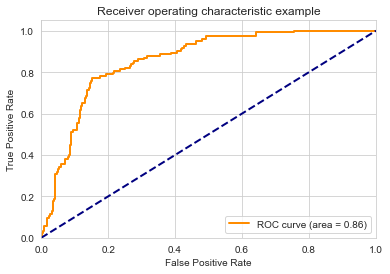

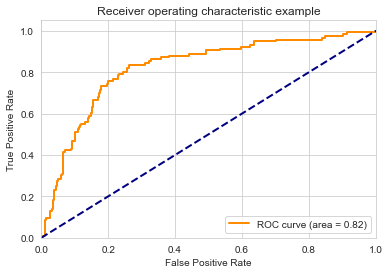

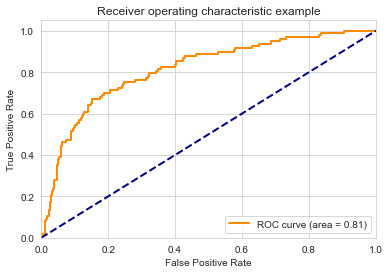

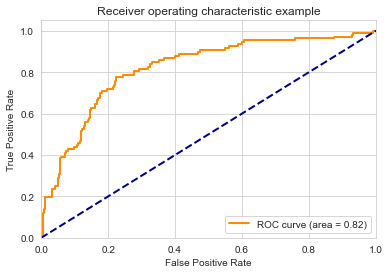

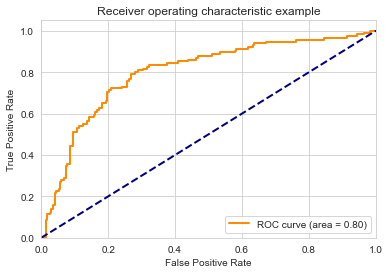

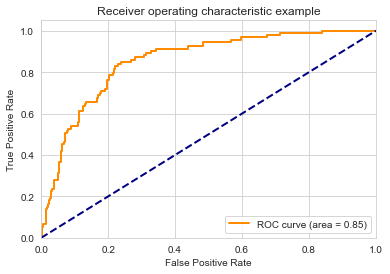

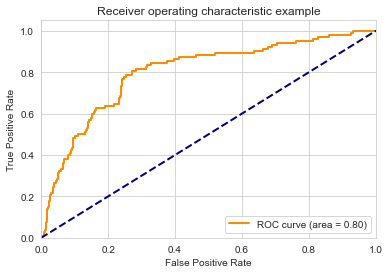

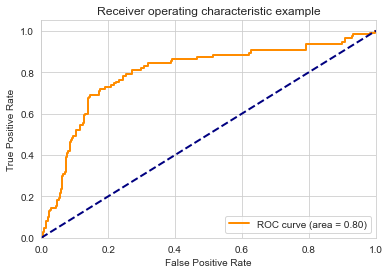

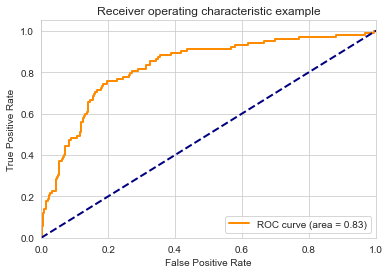

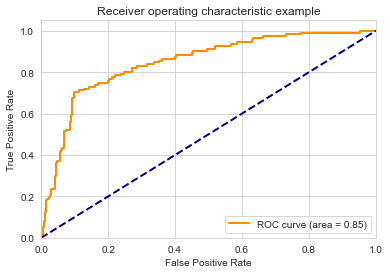

In [168]:
lda = LinearDiscriminantAnalysis()
kf = KFold(n_splits= 10, shuffle= True)

roc_scores_list = []



for train, test in kf.split(X_pca):
    lda.fit(X_pca[train,:], y_2[train])
    y_score_lda1 = lda.decision_function(X_pca[test,:])
    fpr, tpr, _ = roc_curve(y_2[test], y_score_lda1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,
        color="darkorange",lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

# Testing their lda and pca model on our spivey replication data. 

In [101]:
spivey_data = pd.read_csv("/Users/sigurd/Documents/Perception and Action/Perception-Action-Exam/R 2/spivey_data_for_pca.csv")

X_spivey = spivey_data.iloc[:,4:405]
X_spivey['a101'] = 0
y_spivey = spivey_data.iloc[:,2]

#transform
X_spivey_pca = pca_model.transform(X_spivey)

In [70]:

lda = LinearDiscriminantAnalysis()

#Fit lda on Calibration data
lda.fit(X_pca, y)

#predict on Spivey data 
lda.predict(X_spivey_pca)
lda.score(X_spivey_pca, y_spivey)

#get lda values. 
spivey_data["lda_value"] = lda.transform(X_spivey_pca)


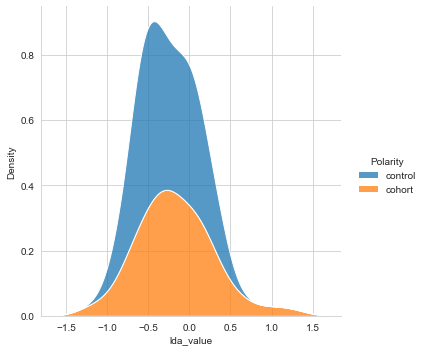

In [80]:
import seaborn as sns

sns.set_style('whitegrid')
sns.displot(spivey_data, x = "lda_value", hue = "Polarity", kind = "kde", multiple = "stack")

In [170]:
y_score_lda = lda.fit(X_pca, y).decision_function(X_spivey_pca)

TypeError: 'str' object cannot be interpreted as an integer

In [103]:
roc_auc_score(y_spivey, y_score_lda)

0.43638099785151585